In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img

In [2]:
img = load_img("iron.jpg", target_size=(50, 50))

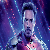

In [3]:
img

In [4]:
arr = np.array(img)

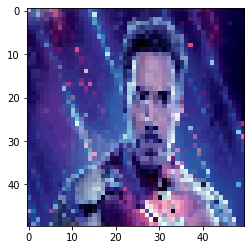

In [5]:
plt.imshow(arr)

In [6]:
twod = arr.mean(axis=2)

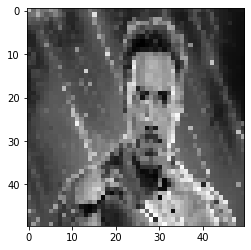

In [7]:
plt.imshow(twod, cmap="gray")

In [8]:
flat = twod.flatten() / 255

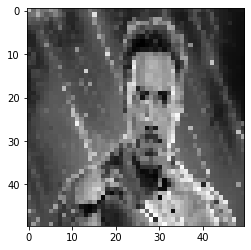

In [9]:
plt.imshow(flat.reshape(twod.shape), cmap="gray")

In [17]:
flat.shape

(10000,)

In [18]:
arr.shape

(100, 100, 3)

In [10]:
population = np.random.randn(1000, *flat.shape)

In [21]:
population.shape

(1000, 10000)

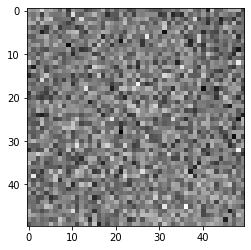

In [29]:
plt.imshow(population[100].reshape(twod.shape), cmap="gray")

In [11]:
flat.max()

0.9882352941176471

In [12]:
from tensorflow.keras.losses import MSE

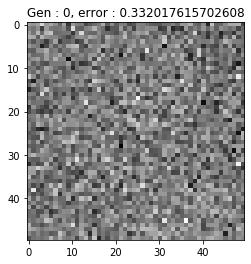

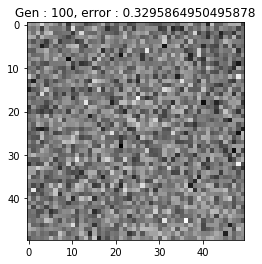

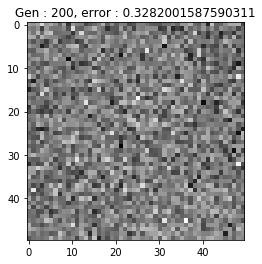

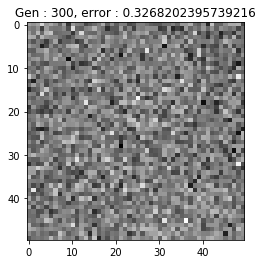

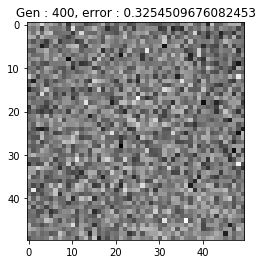

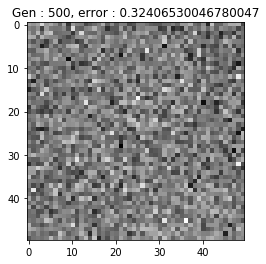

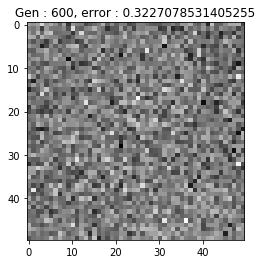

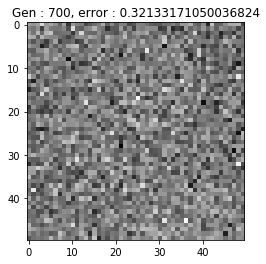

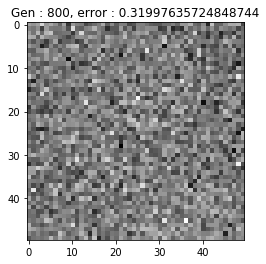

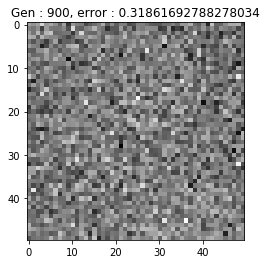

In [30]:
for generation in range(1000):
    
    errors = MSE(flat, population)

    fit_idx = np.argsort(errors)[:10]

    fit = population[fit_idx]

    first = fit[np.random.randint(0, 10, 1000)]
    second = fit[np.random.randint(0, 10, 1000)]


    first_sel = np.random.randint(0, 2, first.shape)

    second_sel = 1 - first_sel

    population = first * first_sel + second * second_sel

    population = population + np.random.randn(*population.shape) * .0001
    
    if generation % 100 == 0:
        
        plt.figure()
        plt.title("Gen : {}, error : {}".format(generation, errors.numpy().min()))
        plt.imshow(fit[0].reshape(twod.shape), cmap="gray")
        plt.show()